Consider the image shown in Figure 2: Image for gamma correction.
(a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value.
(b) Show the histograms of the original and corrected images.

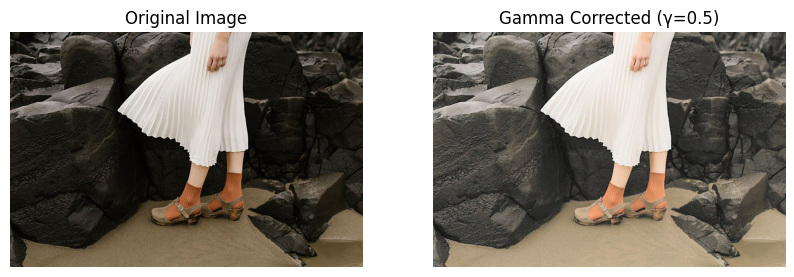

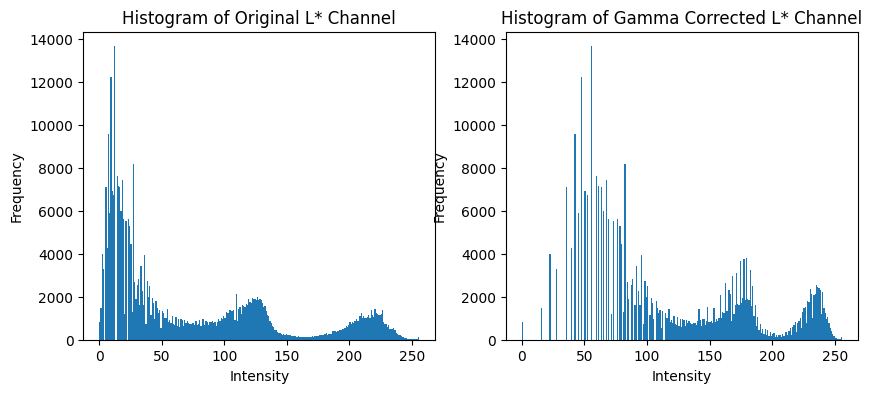

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction_Lab(img_bgr, gamma):
    # Convert BGR to LAB
    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

    # Split channels
    L, a, b = cv2.split(lab)

    # Normalize L channel
    L_norm = L.astype(np.float32) / 255.0

    # Apply gamma correction
    L_gamma = np.power(L_norm, gamma)

    # Scale back to [0,255]
    L_gamma = np.uint8(L_gamma * 255)

    # Merge channels back
    lab_gamma = cv2.merge([L_gamma, a, b])

    # Convert back to BGR
    result = cv2.cvtColor(lab_gamma, cv2.COLOR_LAB2BGR)

    return result, L, L_gamma


# ---- LOAD IMAGE ----
image_path = "../data/original/highlights_and_shadows.jpg"
img_bgr = cv2.imread(image_path)

# Apply gamma correction
gamma_value = 0.5
result_img, L_original, L_corrected = gamma_correction_Lab(img_bgr, gamma_value)

# ---- DISPLAY IMAGES ----
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title(f"Gamma Corrected (γ={gamma_value})")
plt.axis("off")

plt.show()

# ---- HISTOGRAMS ----
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(L_original.flatten(), bins=256, range=[0,256])
plt.title("Histogram of Original L* Channel")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(L_corrected.flatten(), bins=256, range=[0,256])
plt.title("Histogram of Gamma Corrected L* Channel")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.show()
